In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [30]:
data = pd.read_csv('House_Data.csv')

In [31]:
data_ = data.iloc[:, 3:] # all prediction variables

# data normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_norm = scaler.fit_transform(data_)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
PCs = pca.fit_transform(data_norm)
print(PCs.shape)

(21613, 2)


Text(0, 0.5, 'PC 2')

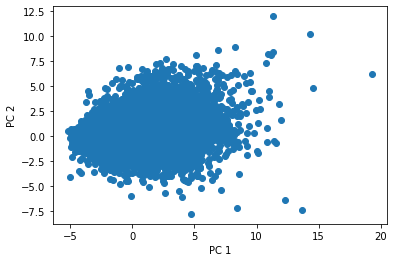

In [32]:
plt.figure()
plt.scatter(PCs[:, 0], PCs[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [33]:
X = PCs
Y = data.loc[:, 'price']
const = np.ones((X.shape[0], 1))
X = np.concatenate((const, X), axis=1)


# data splitting, build training and testing data; 70% for training, 30% for testing
m = 0.7 * X.shape[0]
m = np.ceil(m) # round the number, or using floor fuction
m = int(m)
X_Train = X[:m,:]
Y_Train = Y[:m]
X_Test = X[m:,:]
Y_Test = Y[m:]
print(X_Train.shape, Y_Train.shape)

(15130, 3) (15130,)


In [34]:
# define the loss function
def loss_function(X,Y,B):
    J = np.sum((X.dot(B)-Y)**2)/(2*X.shape[0])
    return J
# create multiple regression with gradient descent
def gradient_descent(X,Y,B,Iterations,alpha):
    loss_history = np.zeros(Iterations)
    for i in range(Iterations):
        gradient = X.T.dot((X.dot(B)-Y))/X.shape[0] #X.T(XB-Y)/N
        B = B - alpha*gradient
        loss_history[i] = loss_function(X,Y,B)
    return B, loss_history

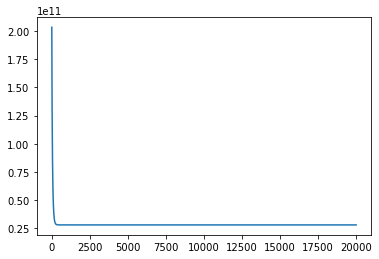

In [35]:
B = np.random.random(X_Train.shape[1])
Iterations = 20000
alpha = 0.01
B_new, loss_history = gradient_descent(X_Train,Y_Train,B,Iterations,alpha)

plt.plot(np.arange(Iterations), loss_history)

(0.0, 2500000.0)

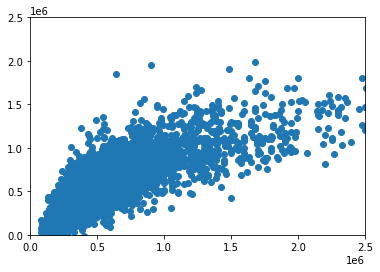

In [36]:
# performance evaluation using testing data
Y_Test_prediction = X_Test.dot(B_new) #6483x19 19x1 ->6483x1
plt.scatter(Y_Test,Y_Test_prediction)
plt.xlim((0,2500000))
plt.ylim((0,2500000))